In [1]:
import pytrends
import pandas as pd
import os
import pycountry
import trends_helpers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets.embed import embed_minimal_html


Looking at five search terms ('passport', 'consulate', 'migration', 'visa', 'inflation') in different countries, with different time frames:
+ Afghanistan: AF
+ Syria: SY
+ Myanmar: MM
+ Democratic Republic of Congo: CD
+ Uruguay: UY
+ Argentina: AR
+ Ethiopia: ET
+ China: CN
+ India: IN
Just to do some hypothesis testing, the searches were done in English.

The `timeframes` list below refers to the start and end dates included in the pytrends search each time. That is, the same term was searched in the same country 6 times, using the 6 different time frames.  

In [2]:
countries = ["AF", "SY", "MM", "CD", "VE", "CO", "UY", "AR", "ET", "CN", "IN"]
keywords_list = ["passport", "consulate", "migration", "visa", "inflation"]
timeframes= ['all', 
            "2005-01-01 2022-01-01",
            "2006-01-01 2022-01-01",
            "2007-01-01 2022-01-01",
            "2008-01-01 2022-01-01",
            "2004-01-01 2007-12-31"]

In [3]:
# Create dropdown widgets for selecting the country and keyword
country_dropdown = widgets.Dropdown(options=countries, description='Country:')
keyword_dropdown = widgets.Dropdown(options=keywords_list, description='Keyword:')

### Some initial tests

#### Correlations between trends, considering same periods.

+ 2008-2021

In [4]:
results = pd.read_csv("testing gtrends_sample.csv").drop(columns=["Unnamed: 0"])
results.head()

,date,trends_index,keyword,region,timeframe
0,2004-01-01,100,passport,AF,all
1,2004-02-01,0,passport,AF,all
2,2004-03-01,0,passport,AF,all
3,2004-04-01,0,passport,AF,all
4,2004-05-01,6,passport,AF,all


In [5]:
results_2008 = results[(results["date"]>"2007-12-31") & (results["date"]<"2022-01-01")]

wide_data_1= pd.DataFrame()
for c in countries:
    for k in keywords_list:
        filtered = results_2008[(results_2008["region"]==c) & (results_2008["keyword"]==k)]
        wide = filtered.pivot(index='date', columns='timeframe', values='trends_index')
        wide["country"]=c
        wide["keyword"]=k
        wide_data_1 = pd.concat([wide_data_1, wide])


In [6]:
def corplots(country, keyword):
    # Clear the output area
    clear_output(wait=True)
    
    # Filter the data based on the selected country and keyword
    country_data = wide_data_1[(wide_data_1["country"] == country) & (wide_data_1["keyword"] == keyword)]
    corr_matrix = country_data[['all', '2005-01-01 2022-01-01', '2006-01-01 2022-01-01', '2007-01-01 2022-01-01', '2008-01-01 2022-01-01']].corr()

    # Create the correlation plot using seaborn
    fig = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
    fig.set_title(str(keyword) + ' in ' + str(country))

    # Show the plot
    plt.show()

# Register the update_plots function as the callback for the dropdown widgets
widgets.interact(corplots, country=country_dropdown, keyword=keyword_dropdown)


interactive(children=(Dropdown(description='Country:', options=('AF', 'SY', 'MM', 'CD', 'VE', 'CO', 'UY', 'AR'…

<function __main__.corplots(country, keyword)>

We see that taking the same period of time for all possible time frames (2008-2021), the is a high correlation in the trends, **except** when the data was scraped for the whole period (2004-2022).

Analyzing and comparing trends:

In [7]:
adjusted_1 = trends_helpers.adjust_trend(df=wide_data_1, columns_to_adjust=list(wide_data_1.columns[0:5,]))
adjusted_1 = adjusted_1.reset_index()
adjusted_1["date"] = pd.to_datetime(adjusted_1['date'])
adjusted_1.head()

timeframe,date,2005-01-01 2022-01-01,2006-01-01 2022-01-01,2007-01-01 2022-01-01,2008-01-01 2022-01-01,all,country,keyword,2005-01-01 2022-01-01_adjusted,2006-01-01 2022-01-01_adjusted,2007-01-01 2022-01-01_adjusted,2008-01-01 2022-01-01_adjusted,all_adjusted
0,2008-01-01,20,22,35,51,1,AF,passport,50.0,51.162791,51.470588,51.0,100.0
1,2008-02-01,0,0,0,0,0,AF,passport,0.0,0.000000,0.000000,0.0,0.0
2,2008-03-01,0,0,0,0,0,AF,passport,0.0,0.000000,0.000000,0.0,0.0
3,2008-04-01,0,0,0,0,0,AF,passport,0.0,0.000000,0.000000,0.0,0.0
4,2008-05-01,0,0,0,0,0,AF,passport,0.0,0.000000,0.000000,0.0,0.0


In [8]:
list_adjusted_cols= ['2005-01-01 2022-01-01_adjusted',
       '2006-01-01 2022-01-01_adjusted', '2007-01-01 2022-01-01_adjusted',
       '2008-01-01 2022-01-01_adjusted', 'all_adjusted']

In [9]:
def update_plots(country, keyword):
    # Clear the output area
    clear_output(wait=True)
    
    country_data = adjusted_1[(adjusted_1["country"] == country) & (adjusted_1["keyword"] == keyword)]
    
    fig = px.line(country_data, x="date", y=list_adjusted_cols, title=f"Searches for {keyword} in {country}")
    fig.show()
# Register the update_plots function as the callback for the dropdown widgets
widgets.interact(update_plots, country=country_dropdown, keyword=keyword_dropdown)


interactive(children=(Dropdown(description='Country:', options=('AF', 'SY', 'MM', 'CD', 'VE', 'CO', 'UY', 'AR'…

<function __main__.update_plots(country, keyword)>

When we take out all_adjusted (data scraped for the whole period), the trends are almost identical for any other time frame.

+ 2007-2021

In [10]:
results_2007 = results[(results["date"]>"2006-12-31") & (results["date"]<"2022-01-01")]

wide_data_2= pd.DataFrame()
for c in countries:
    for k in keywords_list:
        filtered = results_2007[(results_2007["region"]==c) & (results_2007["keyword"]==k)]
        wide = filtered.pivot(index='date', columns='timeframe', values='trends_index')
        wide["country"]=c
        wide["keyword"]=k
        wide_data_2 = pd.concat([wide_data_2, wide])
        wide_data_2 = wide_data_2.fillna(0)

In [11]:
adjusted_2 = trends_helpers.adjust_trend(df=wide_data_2, columns_to_adjust=list(wide_data_2.columns[1:6,]))
adjusted_2 = adjusted_2.reset_index()
adjusted_2["date"] = pd.to_datetime(adjusted_2['date'])

In [12]:
list_adjusted_cols= ['2005-01-01 2022-01-01_adjusted', '2006-01-01 2022-01-01_adjusted',
       '2007-01-01 2022-01-01_adjusted', '2008-01-01 2022-01-01_adjusted',
       'all_adjusted']

In [13]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets.embed import embed_minimal_html
# Create dropdown widgets for selecting the country and keyword
country_dropdown = widgets.Dropdown(options=countries, description='Country:')
keyword_dropdown = widgets.Dropdown(options=keywords_list, description='Keyword:')

def update_plots(country, keyword):
    # Clear the output area
    clear_output(wait=True)
    
    country_data = adjusted_2[(adjusted_2["country"] == country) & (adjusted_2["keyword"] == keyword)]
    
    fig = px.line(country_data, x="date", y=list_adjusted_cols, title=f"Searches for {keyword} in {country}")
    fig.show()
# Register the update_plots function as the callback for the dropdown widgets
widgets.interact(update_plots, country=country_dropdown, keyword=keyword_dropdown)

interactive(children=(Dropdown(description='Country:', options=('AF', 'SY', 'MM', 'CD', 'VE', 'CO', 'UY', 'AR'…

<function __main__.update_plots(country, keyword)>

+ 2006-2021

In [14]:
results_2006 = results[(results["date"]>"2005-12-31") & (results["date"]<"2022-01-01")]

wide_data_3= pd.DataFrame()
for c in countries:
    for k in keywords_list:
        filtered = results_2006[(results_2006["region"]==c) & (results_2006["keyword"]==k)]
        wide = filtered.pivot(index='date', columns='timeframe', values='trends_index')
        wide["country"]=c
        wide["keyword"]=k
        wide_data_3 = pd.concat([wide_data_3, wide])
        #wide_data = wide_data.fillna(0)

In [15]:
adjusted_3 = trends_helpers.adjust_trend(df=wide_data_3, columns_to_adjust=list(wide_data_3.columns[1:6,]))
adjusted_3 = adjusted_3.reset_index()
adjusted_3["date"] = pd.to_datetime(adjusted_3['date'])

In [16]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets.embed import embed_minimal_html
# Create dropdown widgets for selecting the country and keyword
country_dropdown = widgets.Dropdown(options=countries, description='Country:')
keyword_dropdown = widgets.Dropdown(options=keywords_list, description='Keyword:')

def update_plots(country, keyword):
    # Clear the output area
    clear_output(wait=True)
    
    country_data = adjusted_3[(adjusted_3["country"] == country) & (adjusted_3["keyword"] == keyword)]
    
    fig = px.line(country_data, x="date", y=list_adjusted_cols, title=f"Searches for {keyword} in {country}")
    fig.show()
# Register the update_plots function as the callback for the dropdown widgets
widgets.interact(update_plots, country=country_dropdown, keyword=keyword_dropdown)

interactive(children=(Dropdown(description='Country:', options=('AF', 'SY', 'MM', 'CD', 'VE', 'CO', 'UY', 'AR'…

<function __main__.update_plots(country, keyword)>

+ Testing by aggregating monthly trends

In [17]:
results_2006 = results[(results["date"]>"2005-12-31") & (results["date"]<"2022-01-01")]
results_2006.set_index('date', inplace=True)
results_2006.index = pd.DatetimeIndex(results_2006.index)

# Group by 'Country', 'Keyword', and 'Timeframe' columns and resample by month, then mean the values
monthly_aggregated = results_2006.groupby(['region', 'keyword', 'timeframe']).resample('M').mean().reset_index()

monthly_aggregated

,region,keyword,timeframe,date,trends_index
0,AF,consulate,2004-01-01 2007-12-31,2006-01-31,0.00
1,AF,consulate,2004-01-01 2007-12-31,2006-02-28,1.25
2,AF,consulate,2004-01-01 2007-12-31,2006-03-31,0.00
3,AF,consulate,2004-01-01 2007-12-31,2006-04-30,2.00
4,AF,consulate,2004-01-01 2007-12-31,2006-05-31,0.00
...,...,...,...,...,...
53083,VE,visa,all,2021-08-31,33.00
53084,VE,visa,all,2021-09-30,30.00
53085,VE,visa,all,2021-10-31,35.00
53086,VE,visa,all,2021-11-30,29.00


In [18]:
wide_data= pd.DataFrame()
for c in countries:
    for k in keywords_list:
        filtered = monthly_aggregated[(monthly_aggregated["region"]==c) & (monthly_aggregated["keyword"]==k)]
        wide = filtered.pivot(index='date', columns='timeframe', values='trends_index')
        wide["country"]=c
        wide["keyword"]=k
        wide_data = pd.concat([wide_data, wide])
        #wide_data = wide_data.fillna(0)

In [19]:
adjusted = trends_helpers.adjust_trend(df=wide_data, columns_to_adjust=list(wide_data.columns[1:6,]))
adjusted = adjusted.reset_index()
adjusted["date"] = pd.to_datetime(adjusted['date'])
adjusted.head()

timeframe,date,2004-01-01 2007-12-31,2005-01-01 2022-01-01,2006-01-01 2022-01-01,2007-01-01 2022-01-01,2008-01-01 2022-01-01,all,country,keyword,2005-01-01 2022-01-01_adjusted,2006-01-01 2022-01-01_adjusted,2007-01-01 2022-01-01_adjusted,2008-01-01 2022-01-01_adjusted,all_adjusted
0,2006-01-31,2.4,0.0,0.0,NaN,NaN,0.0,AF,passport,0.000000,0.0,NaN,NaN,0.0
1,2006-02-28,0.0,0.0,0.0,NaN,NaN,0.0,AF,passport,0.000000,0.0,NaN,NaN,0.0
2,2006-03-31,0.0,77.0,84.0,NaN,NaN,2.0,AF,passport,83.695652,84.0,NaN,NaN,100.0
3,2006-04-30,0.6,92.0,100.0,NaN,NaN,2.0,AF,passport,100.000000,100.0,NaN,NaN,100.0
4,2006-05-31,0.0,0.0,0.0,NaN,NaN,0.0,AF,passport,0.000000,0.0,NaN,NaN,0.0


In [20]:
# Create dropdown widgets for selecting the country and keyword
country_dropdown = widgets.Dropdown(options=countries, description='Country:')
keyword_dropdown = widgets.Dropdown(options=keywords_list, description='Keyword:')

def update_plots(country, keyword):
    # Clear the output area
    clear_output(wait=True)
    
    country_data = adjusted[(adjusted["country"] == country) & (adjusted["keyword"] == keyword)]
    
    fig = px.line(country_data, x="date", y=list_adjusted_cols, title=f"Searches for {keyword} in {country}")
    fig.show()
# Register the update_plots function as the callback for the dropdown widgets
widgets.interact(update_plots, country=country_dropdown, keyword=keyword_dropdown)

interactive(children=(Dropdown(description='Country:', options=('AF', 'SY', 'MM', 'CD', 'VE', 'CO', 'UY', 'AR'…

<function __main__.update_plots(country, keyword)>

### Testing against RF forecasting + gtrends

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [22]:
import pycountry

# Define a function to convert ISO2 to ISO3
def convert_iso2_to_iso3(iso2_code):
    try:
        country = pycountry.countries.get(alpha_2=iso2_code)
        return country.alpha_3
    except AttributeError:
        # ISO2 code not found
        return 'N/A'

# Convert ISO2 to ISO3
iso3_codes = [convert_iso2_to_iso3(code) for code in countries]
iso3_codes

['AFG', 'SYR', 'MMR', 'COD', 'VEN', 'COL', 'URY', 'ARG', 'ETH', 'CHN', 'IND']

+ Current baseline RF for outflows, without text data

In [23]:
def multi_shift(df, shift_range, columns):
    shifted_data = []
    for shift_value in range(shift_range.start, shift_range.stop):
        shifted = df[columns].shift(shift_value)
        shifted_data.append(shifted)
    shifted_df = pd.concat(shifted_data, axis=1, keys=[f'Shift_{shift_value}' for shift_value in range(shift_range.start, shift_range.stop)])
    shifted_df.columns = [' '.join(col).strip() for col in shifted_df.columns.values]
    return pd.concat([df, shifted_df],axis=1).dropna()

In [24]:
import operator
def filter_multi_date(df,col,val, relate):
    ops = {'>': operator.gt,
        '<': operator.lt,
        '>=': operator.ge,
        '<=': operator.le,
        '==': operator.eq}
    col_index = pd.Series(df.index.names)[(pd.Series(df.index.names) == col)].index.tolist()[0]
    return ops[relate](df.index.get_level_values(col_index),  pd.to_datetime(val))

In [25]:
# data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
#        'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
#        'typeOfViolence_o', 'best_est_o', 'Nyear_conflict_o', 'Nyear_log_o',
#        'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
       'typeOfViolence_o', 'Nyear_conflict_o', 'Nyear_log_o',
       'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

data_outflows = data_outflows[data_outflows["iso_o"].isin(iso3_codes)]

# preprocessing
data_outflows['year'] = pd.to_datetime(data_outflows['year'], format='%Y')
data_outflows = pd.concat([data_outflows.drop('newarrival',axis=1).groupby(['iso_o', 'year']).first(),data_outflows.groupby(['iso_o', 'year']).newarrival.sum()],axis=1)

In [26]:
# create lagged dataset
lagged_outflows = data_outflows.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)
h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)

In [27]:
# Implement random forest
end_train = '2016-01-01'
end_val = '2016-01-01'

X_train = lagged_outflows[filter_multi_date(lagged_outflows, 'year',end_train,'<=')]
y_train = h1_outflows[filter_multi_date(h1_outflows, 'year',end_train,'<=')].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1)
rf_outflow.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [28]:
X_test = lagged_outflows[filter_multi_date(lagged_outflows, 'year',end_train,'>')]
X_test = X_test[filter_multi_date(X_test, 'year','2021','<')]
y_test = h1_outflows[filter_multi_date(h1_outflows,'year',end_train,'>')].dropna()
y_test = y_test[filter_multi_date(y_test, 'year','2021','<')]


In [29]:
y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

In [30]:
mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)

376406.1985027417

In [31]:
def feature_imp(coef, names):
    imp = coef
    indexes = np.argsort(imp)[-11:]
    indexes = list(indexes)
    
    plt.barh(range(len(indexes)), imp[indexes], align='center')
    plt.yticks(range(len(indexes)), [names[i] for i in indexes])
    plt.show()
    
    return indexes

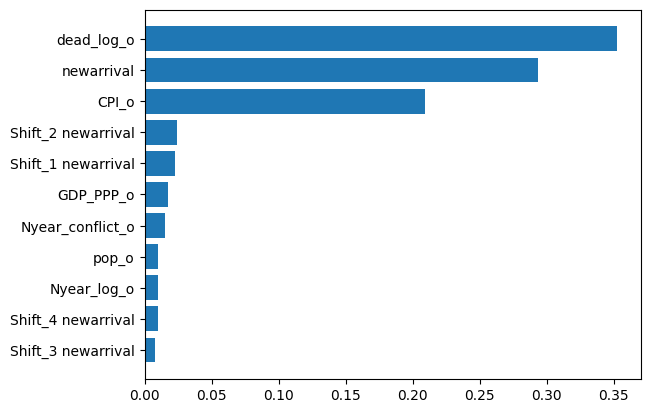

In [32]:
feature_names = X_train.columns
feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

+ Training a model for the selection of countries with gtrends data

In [33]:
timeframes.remove("2004-01-01 2007-12-31")
timeframes

['all',
 '2005-01-01 2022-01-01',
 '2006-01-01 2022-01-01',
 '2007-01-01 2022-01-01',
 '2008-01-01 2022-01-01']

In [34]:
data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
       'typeOfViolence_o', 'Nyear_conflict_o', 'Nyear_log_o',
       'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

data_outflows = data_outflows[data_outflows["iso_o"].isin(iso3_codes)]

# preprocessing
data_outflows['year'] = pd.to_datetime(data_outflows['year'], format='%Y')
data_outflows['year'] = data_outflows['year'].dt.year
data_outflows = pd.concat([data_outflows.drop('newarrival',axis=1).groupby(['iso_o', 'year']).first(),data_outflows.groupby(['iso_o', 'year']).newarrival.sum()],axis=1)

# create lagged dataset
lagged_outflows = data_outflows.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)

h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)
h1_outflows = pd.DataFrame(h1_outflows)

h1_outflows.index = pd.MultiIndex.from_arrays([h1_outflows.index.get_level_values('iso_o'),
                                                 pd.to_datetime(h1_outflows.index.get_level_values('year').astype(str), format='%Y')], 
                                                 names=['iso_o', 'year'])

h1_outflows= h1_outflows["newarrival"]



In [35]:
results = pd.read_csv("testing gtrends_sample.csv").drop(columns=["Unnamed: 0"])
results = results[results["region"].isin(countries)]
results["iso_o"]= results["region"].apply(lambda x: convert_iso2_to_iso3(x))
results.set_index('date', inplace=True)
results.index = pd.DatetimeIndex(results.index)
results = results.drop(columns=["region"])
# Group by 'Country', 'Keyword', and 'Timeframe' columns and resample by month, then mean the values
year_agg = results.groupby(['keyword', 'timeframe', 'iso_o']).resample('Y').mean().reset_index()
year_agg['year'] = year_agg['date'].dt.year
year_agg["keyword_time"]= year_agg["keyword"].str.cat(year_agg["timeframe"], sep="_")
year_agg= year_agg.drop(columns=["date", "keyword", "timeframe"])


In [36]:
pivoted = year_agg.pivot(index=['iso_o', 'year'], columns='keyword_time', values='trends_index')

In [37]:
# Generate six datasets based on the suffixes (timeframes)
datasets = {}
for suffix in timeframes:
    filtered_columns = pivoted.filter(regex=f"_{suffix}$")
    datasets[suffix] = pivoted[filtered_columns.columns]

# Create an empty dictionary to store merged datasets 
merged_dfs = {}

for t in timeframes:

    merged_df_t = pd.merge(lagged_outflows, datasets[t], left_index=True, right_index=True, how='left')
    # Store the df in the dictionary
    merged_dfs[t] = merged_df_t
    merged_dfs[t].index = pd.MultiIndex.from_arrays([
        merged_dfs[t].index.get_level_values('iso_o'),
        pd.to_datetime(merged_dfs[t].index.get_level_values('year').astype(str), format='%Y')
        ], names=['iso_o', 'year'])


RMSE using trends from time frame all:  377541.08637


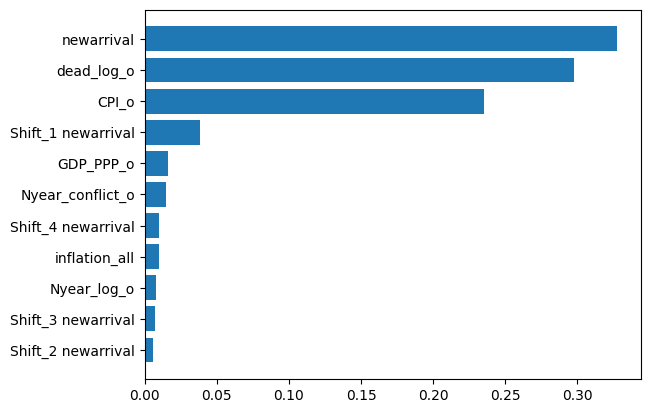

RMSE using trends from time frame 2005-01-01 2022-01-01:  397264.87920


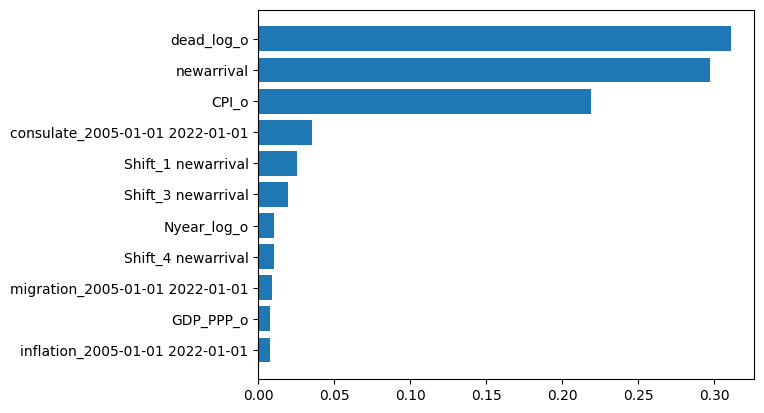

RMSE using trends from time frame 2006-01-01 2022-01-01:  408729.30325


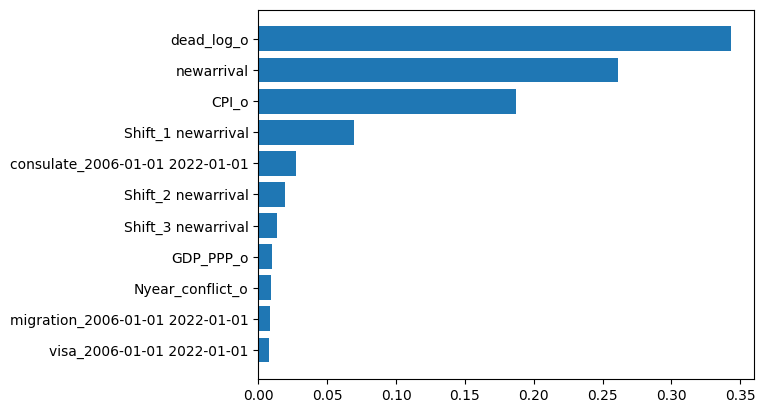

RMSE using trends from time frame 2007-01-01 2022-01-01:  394089.85321


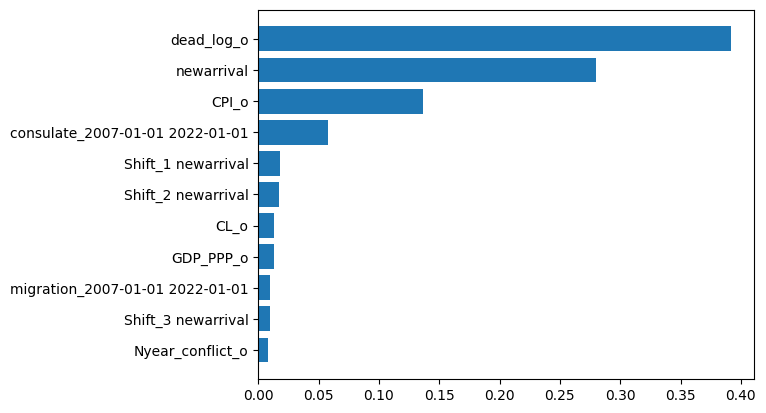

RMSE using trends from time frame 2008-01-01 2022-01-01:  401690.34708


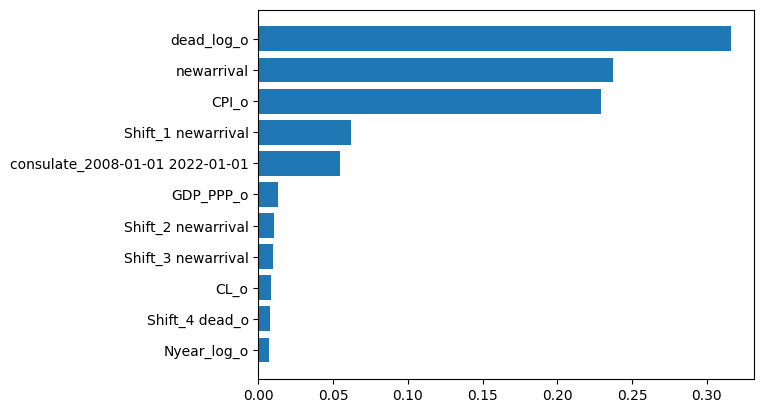

In [38]:
for t in timeframes:
  
    X_train = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'<=')]
    y_train = h1_outflows [filter_multi_date(h1_outflows, 'year',end_train,'<=')]

    # Concatenate X_train and y_train along axis=1 to ensure corresponding rows are dropped together
    combined_df = pd.concat([X_train, y_train], axis=1)
    # Drop rows with missing values from combined DataFrame
    combined_df.dropna(inplace=True)
    # Separate X_train and y_train after dropping rows
    X_train_cleaned = combined_df.iloc[:, :-1]  # All columns except the last one
    y_train_cleaned = combined_df.iloc[:, -1]   # Last column
    X_train = pd.DataFrame(X_train_cleaned, columns=X_train.columns)
    y_train = pd.Series(y_train_cleaned, name=y_train.name)
    
    rf_outflow = RandomForestRegressor(n_jobs = -1)
    rf_outflow.fit(X_train, y_train)

    X_test = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'>')]
    X_test = X_test[filter_multi_date(X_test, 'year','2021','<')]
    y_test = h1_outflows[filter_multi_date(h1_outflows,'year',end_train,'>')].dropna()
    y_test = y_test[filter_multi_date(y_test, 'year','2021','<')]

    y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
    y_pred.index = X_test.index

    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)
    formatted_rmse = "{:.5f}".format(rmse)


    print('RMSE using trends from time frame ' + str(t) + ": ", formatted_rmse)

    feature_names = X_train.columns
    feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)


Using this approach, RMSE goes down only using the whole trend. This makes sense because otherwhise I'm dropping a lot of data.

We can test imputing NaN values. 

First try: impute NaN with 0 + add a dummy of value 1 when google trends is not available.

In [39]:
merged_dfs = {}

for t in timeframes:

    merged_df_t = pd.merge(lagged_outflows, datasets[t], left_index=True, right_index=True, how='left')

    trends_nan = merged_df_t.iloc[:, -5:].isna().all(axis=1)

    # Create a dummy variable where the gtrends variables are NaN
    merged_df_t['gtrends_not_available'] = np.where(trends_nan, 1, 0)

    # And then fill the nans
    merged_df_t = merged_df_t.fillna(0)
   
    # Store the df in the dictionary
    merged_dfs[t] = merged_df_t

    # Correct index to match the format for later
    merged_dfs[t].index = pd.MultiIndex.from_arrays([
        merged_dfs[t].index.get_level_values('iso_o'),
        pd.to_datetime(merged_dfs[t].index.get_level_values('year').astype(str), format='%Y')
        ], names=['iso_o', 'year'])
    

RMSE using trends from time frame all:  386469.31520


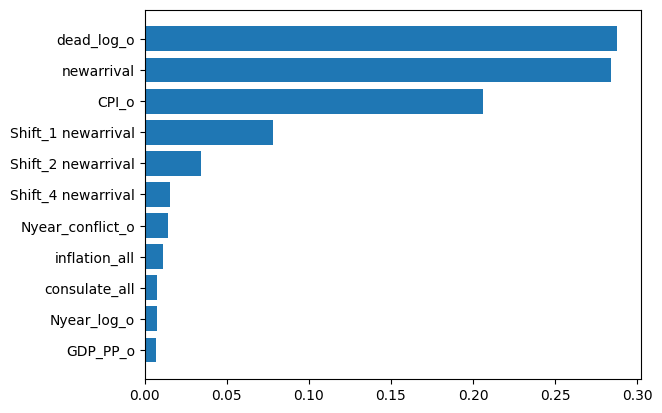

RMSE using trends from time frame 2005-01-01 2022-01-01:  396072.44358


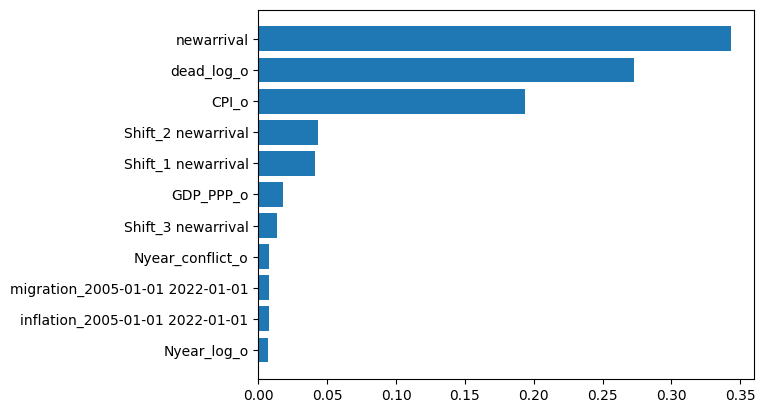

RMSE using trends from time frame 2006-01-01 2022-01-01:  383833.18887


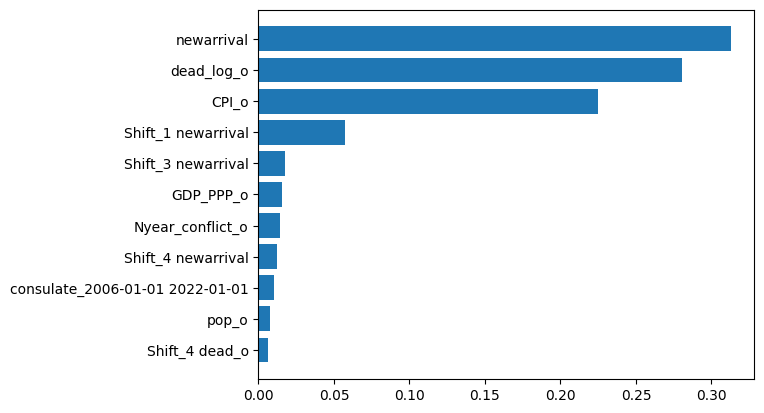

RMSE using trends from time frame 2007-01-01 2022-01-01:  380048.81560


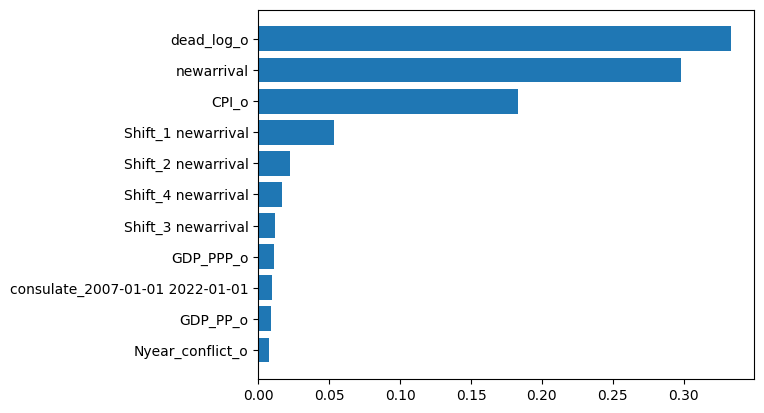

RMSE using trends from time frame 2008-01-01 2022-01-01:  389079.22133


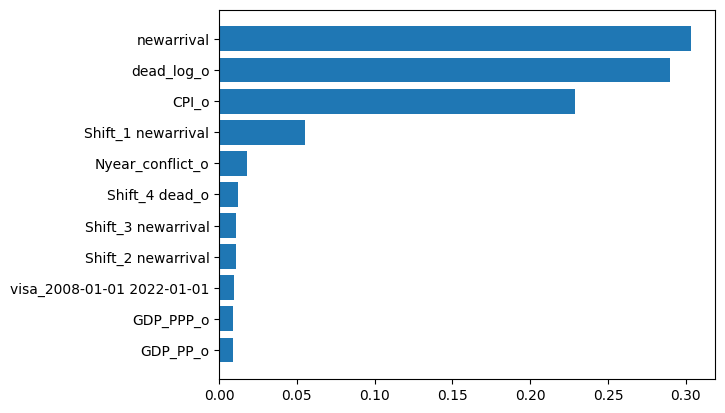

In [40]:
for t in timeframes:
  
    X_train = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'<=')]
    y_train = h1_outflows [filter_multi_date(h1_outflows, 'year',end_train,'<=')]

   
    rf_outflow = RandomForestRegressor(n_jobs = -1)
    rf_outflow.fit(X_train, y_train)

    X_test = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'>')]
    X_test = X_test[filter_multi_date(X_test, 'year','2021','<')]
    y_test = h1_outflows[filter_multi_date(h1_outflows,'year',end_train,'>')].dropna()
    y_test = y_test[filter_multi_date(y_test, 'year','2021','<')]

    y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
    y_pred.index = X_test.index

    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)
    formatted_rmse = "{:.5f}".format(rmse)

    print('RMSE using trends from time frame ' + str(t) + ": ", formatted_rmse)

    feature_names = X_train.columns
    feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

'all' and from 2008 seem to do better

Other options: imputing missing values (mean, iterative imputer...)

+ Mean imputation

In [41]:
# Generate six datasets based on the suffixes (timeframes)
datasets = {}
for suffix in timeframes:
    filtered_columns = pivoted.filter(regex=f"_{suffix}$")
    datasets[suffix] = pivoted[filtered_columns.columns]
    
# Create an empty dictionary to store merged datasets 
merged_dfs = {}

for t in timeframes:

    merged_df_t = pd.merge(lagged_outflows, datasets[t], left_index=True, right_index=True, how='left')
    
    # Mean imputation
    merged_df_t = merged_df_t.groupby('iso_o').apply(lambda x: x.fillna(x.mean()))
    merged_df_t = merged_df_t.reset_index(level=1, drop=True)

    # Store the df in the dictionary
    merged_dfs[t] = merged_df_t
    merged_dfs[t].index = pd.MultiIndex.from_arrays([
       merged_dfs[t].index.get_level_values('iso_o'),
       pd.to_datetime(merged_dfs[t].index.get_level_values('year').astype(str), format='%Y')
       ], names=['iso_o', 'year'])
        
    

    

RMSE using trends from time frame all:  394251.75874


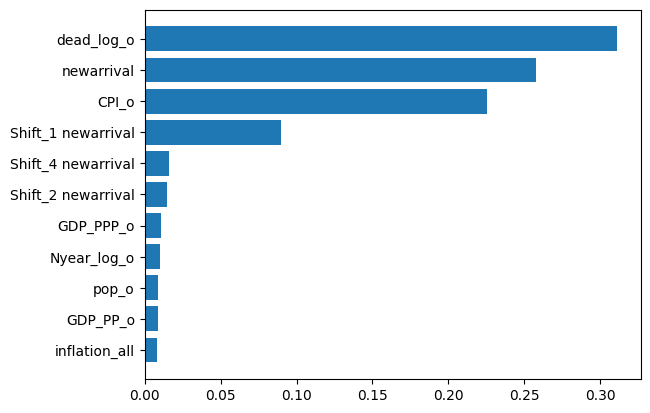

RMSE using trends from time frame 2005-01-01 2022-01-01:  393291.82288


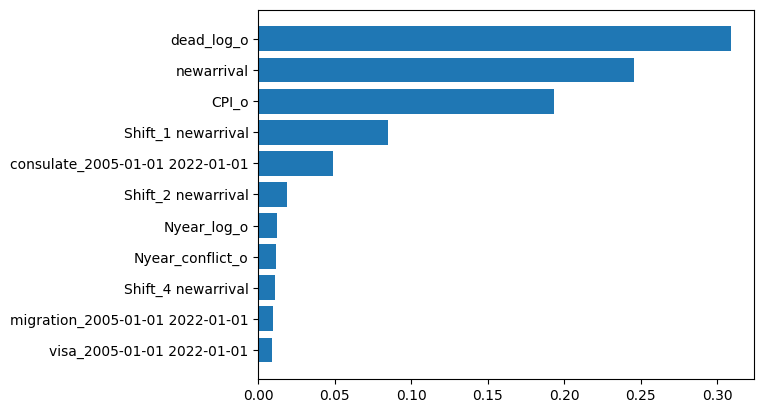

RMSE using trends from time frame 2006-01-01 2022-01-01:  398432.13932


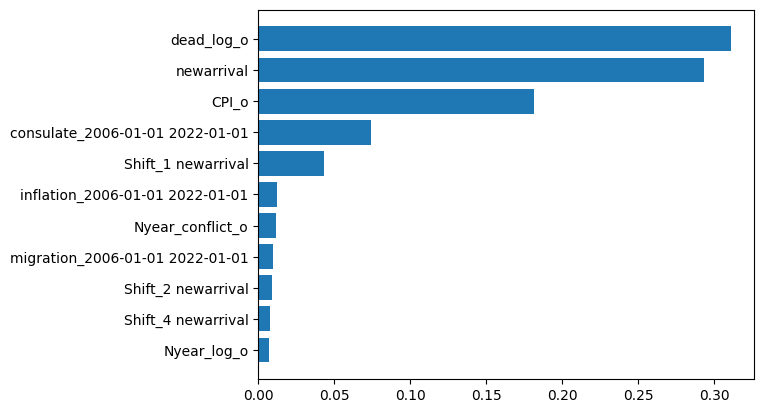

RMSE using trends from time frame 2007-01-01 2022-01-01:  385357.11383


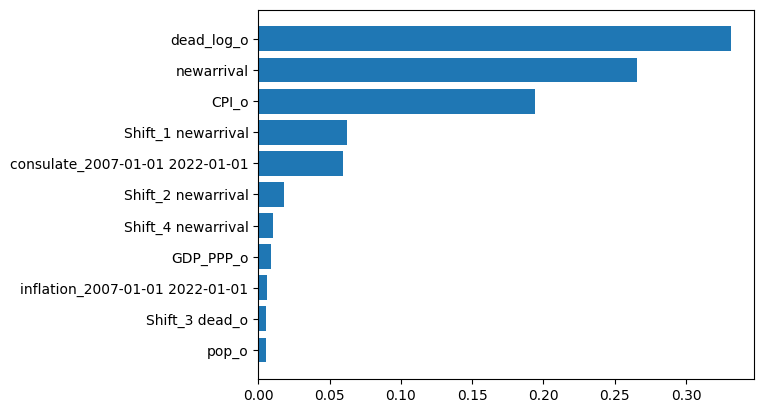

RMSE using trends from time frame 2008-01-01 2022-01-01:  401060.25860


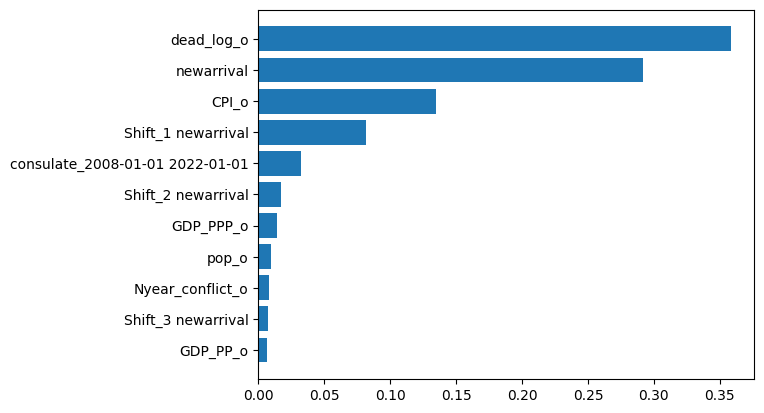

In [42]:
for t in timeframes:
  
    X_train = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'<=')]
    y_train = h1_outflows[filter_multi_date(h1_outflows, 'year',end_train,'<=')]

    rf_outflow = RandomForestRegressor(n_jobs = -1)
    rf_outflow.fit(X_train, y_train)

    X_test = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'>')]
    X_test = X_test[filter_multi_date(X_test, 'year','2021','<')]
    y_test = h1_outflows[filter_multi_date(h1_outflows,'year',end_train,'>')].dropna()
    y_test = y_test[filter_multi_date(y_test, 'year','2021','<')]

    y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
    y_pred.index = X_test.index

    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)
    formatted_rmse = "{:.5f}".format(rmse)

    print('RMSE using trends from time frame ' + str(t) + ": ", formatted_rmse)

    feature_names = X_train.columns
    feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

Instead of taking each gtrends variable separate, we can try some aggregated index.

With mean imputation:

In [43]:
# Generate six datasets based on the suffixes (timeframes)
datasets = {}
for suffix in timeframes:
    filtered_columns = pivoted.filter(regex=f"_{suffix}$")
    datasets[suffix] = pivoted[filtered_columns.columns]
    average = datasets[suffix].mean(axis=1)
    datasets[suffix]['trends_index']=average
    datasets[suffix]=datasets[suffix].drop(datasets[suffix].columns[:5], axis=1)
# Create an empty dictionary to store merged datasets 
merged_dfs = {}

for t in timeframes:

    merged_df_t = pd.merge(lagged_outflows, datasets[t], left_index=True, right_index=True, how='left')
    
    # Mean imputation
    merged_df_t = merged_df_t.groupby('iso_o').apply(lambda x: x.fillna(x.mean()))
    merged_df_t = merged_df_t.reset_index(level=1, drop=True)

    # Store the df in the dictionary
    merged_dfs[t] = merged_df_t
    merged_dfs[t].index = pd.MultiIndex.from_arrays([
       merged_dfs[t].index.get_level_values('iso_o'),
       pd.to_datetime(merged_dfs[t].index.get_level_values('year').astype(str), format='%Y')
       ], names=['iso_o', 'year'])
        
    


C:\Users\danid\AppData\Local\Temp\ipykernel_10732\366826270.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\danid\AppData\Local\Temp\ipykernel_10732\366826270.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\danid\AppData\Local\Temp\ipykernel_10732\366826270.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

RMSE using trends from time frame all:  376903.72372


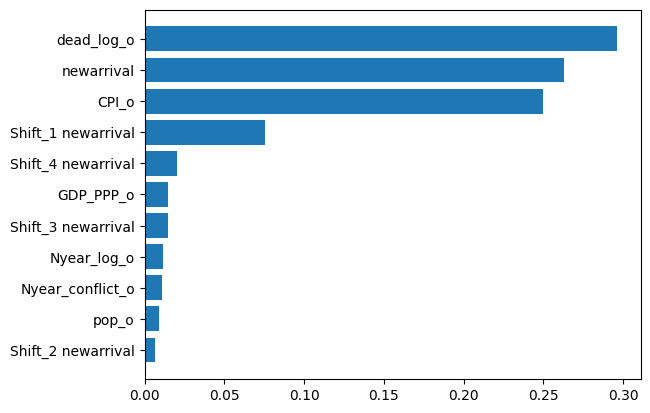

RMSE using trends from time frame 2005-01-01 2022-01-01:  383535.14339


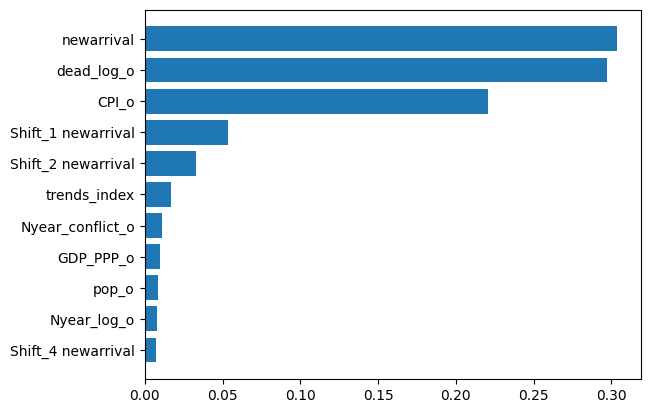

RMSE using trends from time frame 2006-01-01 2022-01-01:  383545.98022


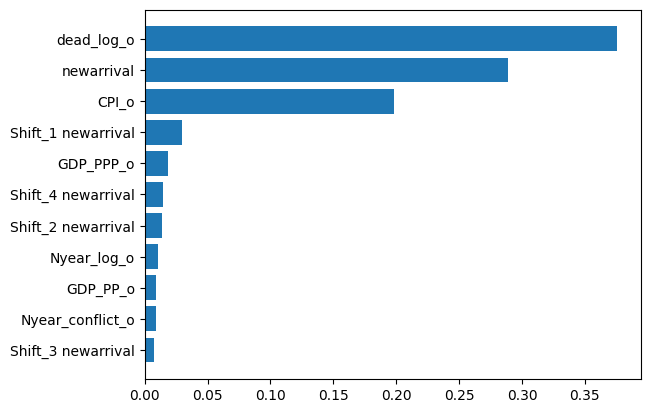

RMSE using trends from time frame 2007-01-01 2022-01-01:  380647.22164


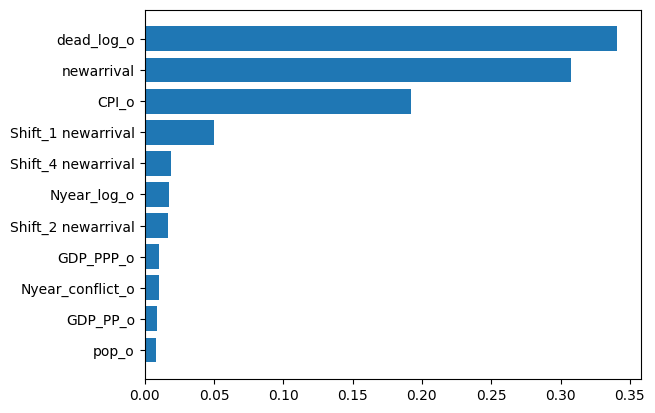

RMSE using trends from time frame 2008-01-01 2022-01-01:  380056.63366


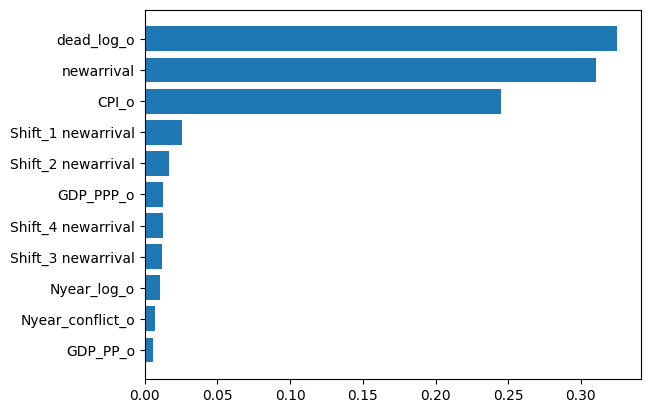

In [44]:
for t in timeframes:
  
    X_train = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'<=')]
    y_train = h1_outflows[filter_multi_date(h1_outflows, 'year',end_train,'<=')]

    rf_outflow = RandomForestRegressor(n_jobs = -1)
    rf_outflow.fit(X_train, y_train)

    X_test = merged_dfs[t][filter_multi_date(merged_dfs[t], 'year',end_train,'>')]
    X_test = X_test[filter_multi_date(X_test, 'year','2021','<')]
    y_test = h1_outflows[filter_multi_date(h1_outflows,'year',end_train,'>')].dropna()
    y_test = y_test[filter_multi_date(y_test, 'year','2021','<')]

    y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
    y_pred.index = X_test.index

    rmse = mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)
    formatted_rmse = "{:.5f}".format(rmse)

    print('RMSE using trends from time frame ' + str(t) + ": ", formatted_rmse)

    feature_names = X_train.columns
    feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)